In [1]:
import numpy as np
import sys, os, git, lammps_logfile
from matplotlib import pyplot as plt

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path+"/docs/inputs/shared-pyplot-files/")
from pyplot_parameters import colors, complete_panel, save_figure, set_boundaries, \
                              add_subplotlabels # set_boundaries
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[2][-1]
tutorial_name = path_in_folder.split("/")[3]
path_figures = "/docs/sphinx/source/tutorials/figures/level" + level + "/" + tutorial_name + "/"
print("level:" , level, "& tutorial name:", tutorial_name)
print("figures will be saved in", path_figures)

level: 2 & tutorial name: nanosheared-electrolyte
figures will be saved in /docs/sphinx/source/tutorials/figures/level2/nanosheared-electrolyte/


In [3]:
_, z, _, density_water, velocity_water = np.loadtxt("water.profile_1A.dat", skiprows=4).T
_, z, _, density_solid, velocity_solid = np.loadtxt("wall.profile_1A.dat", skiprows=4).T
_, z, _, density_ions, velocity_ions = np.loadtxt("ions.profile_1A.dat", skiprows=4).T
z /= 10 # nm
velocity_water *= 1e5 # m/s
velocity_solid *= 1e5 # m/s
velocity_ions *= 1e5 # m/s

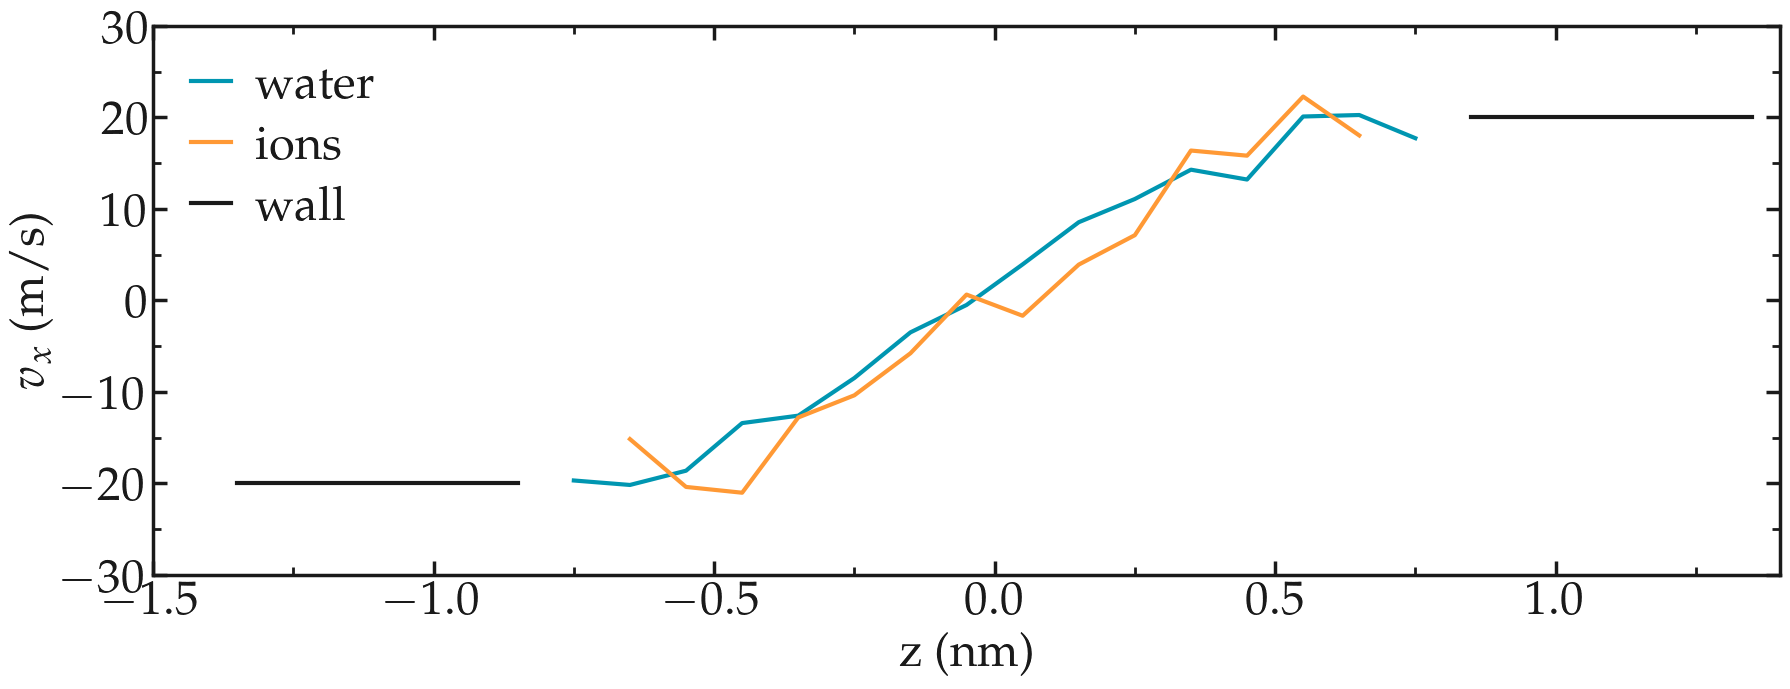

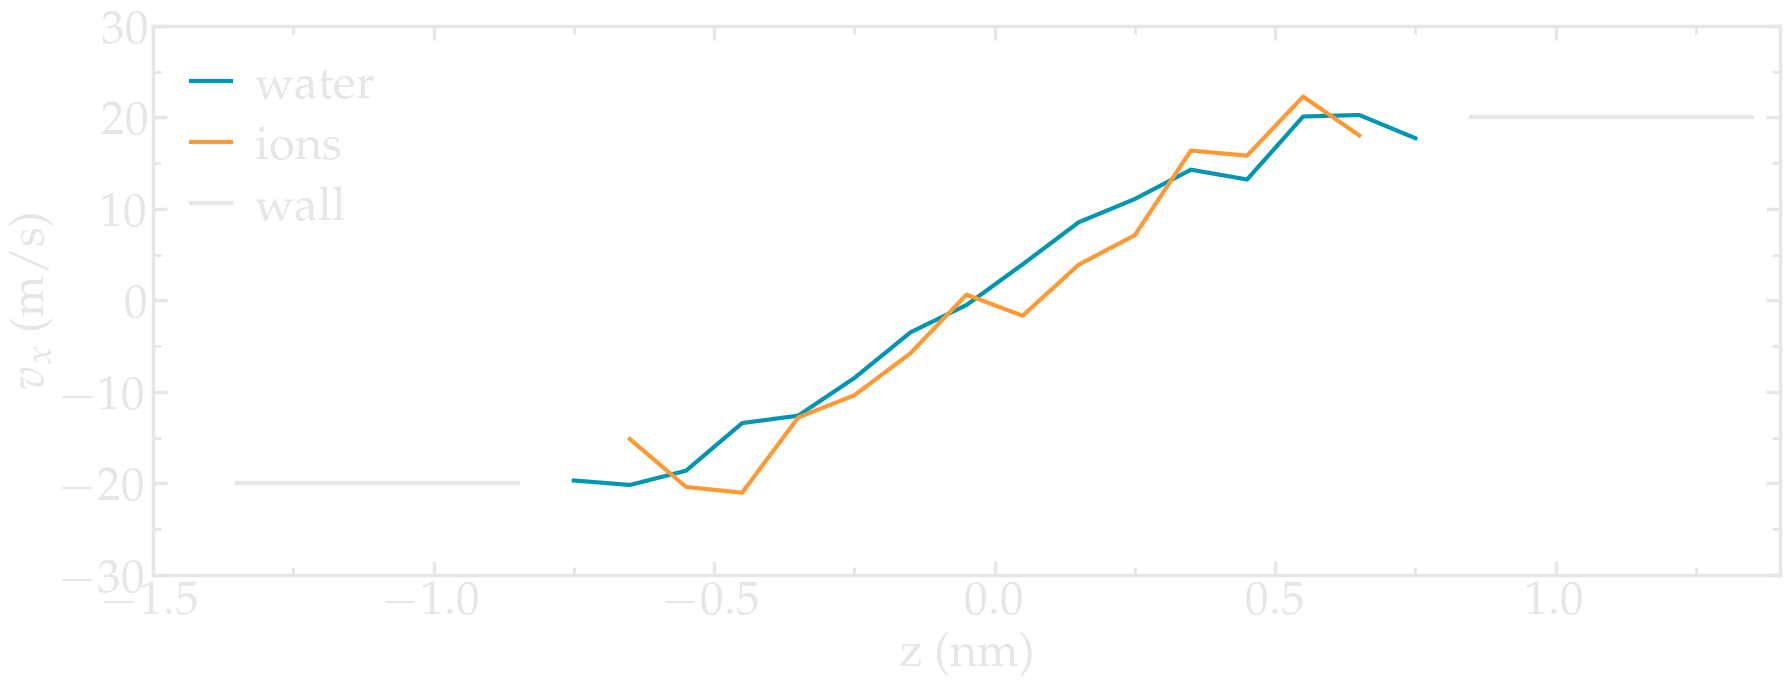

In [4]:
filename = "shearing"
for mode, mygray in zip(['light', 'dark'], [colors["lightgray"], colors["darkgray"]]):    
    fig = plt.figure(figsize=(18,7))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(z[density_water>0.02], velocity_water[density_water>0.02], color=colors["myblue"], linewidth=3, label=r'water')
    ax[-1].plot(z[density_ions>0.02], velocity_ions[density_ions>0.02], color=colors["myorange"], linewidth=3, label=r'ions')
    ax[-1].plot(z[(density_solid>0) & (z<0)], velocity_solid[(density_solid>0) & (z<0)], color=mygray, linewidth=3, label=r'wall')
    ax[-1].plot(z[(density_solid>0) & (z>0)], velocity_solid[(density_solid>0) & (z>0)], color=mygray, linewidth=3)
    complete_panel(ax[-1], r'z (nm)', r'$v_x$ (m/s)', legend=True, axis_color=mygray)
    set_boundaries(plt, x_ticks=np.arange(-1.5, 1.5, 0.5), x_boundaries=(-1.4, 1.4),
                   y_ticks=np.arange(-30, 40, 10), y_boundaries=(-25, 25))
    #add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)

In [5]:
_, z, _, density_water, velocity_water = np.loadtxt("water.profile_0.1A.dat", skiprows=4).T
_, z, _, density_solid, velocity_solid = np.loadtxt("wall.profile_0.1A.dat", skiprows=4).T
_, z, _, density_ions, velocity_ions = np.loadtxt("ions.profile_0.1A.dat", skiprows=4).T
z /= 10 # nm
velocity_water *= 1e5 # m/s
velocity_solid *= 1e5 # m/s
velocity_ions *= 1e5 # m/s

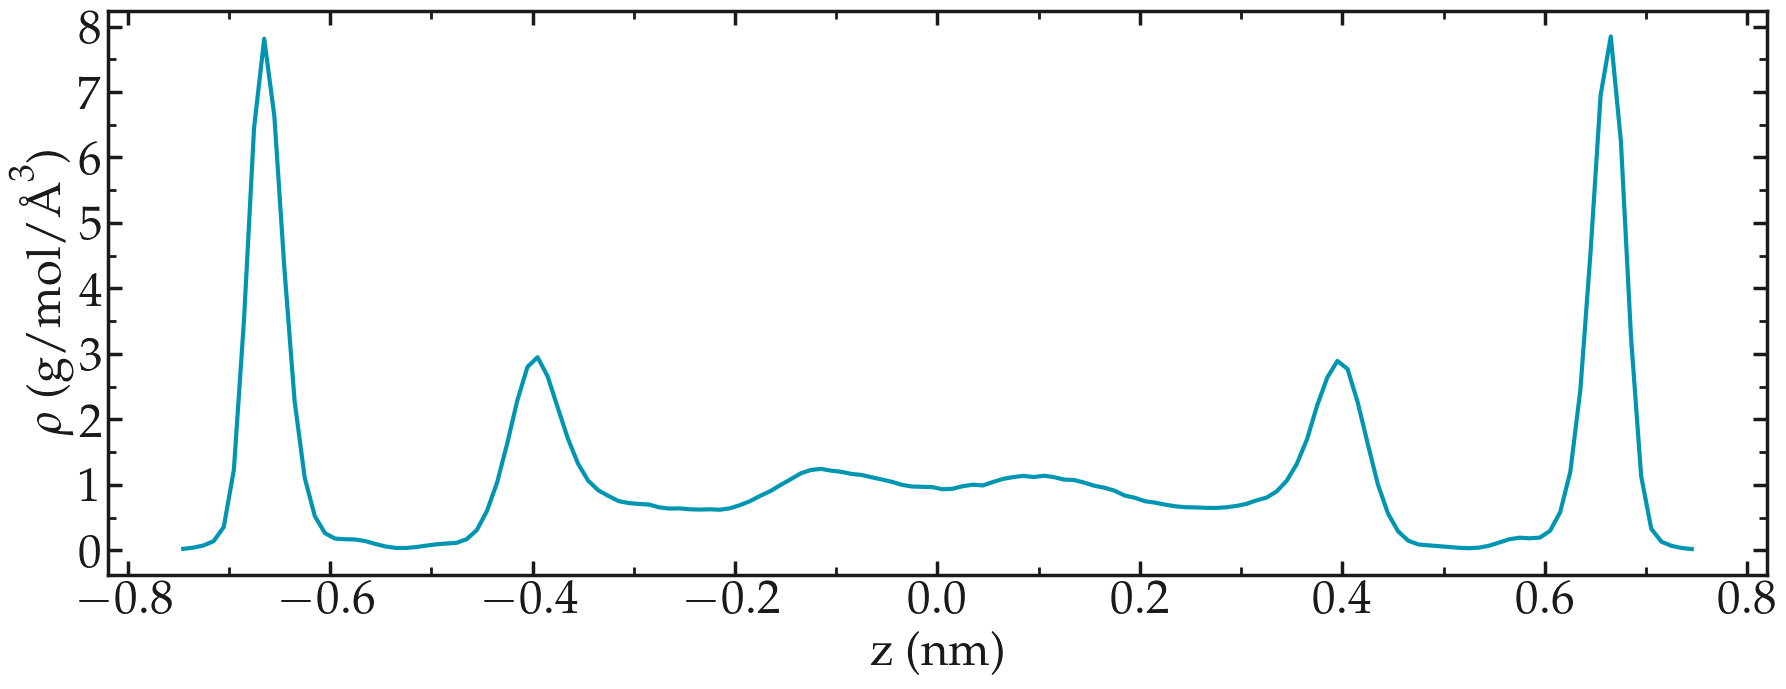

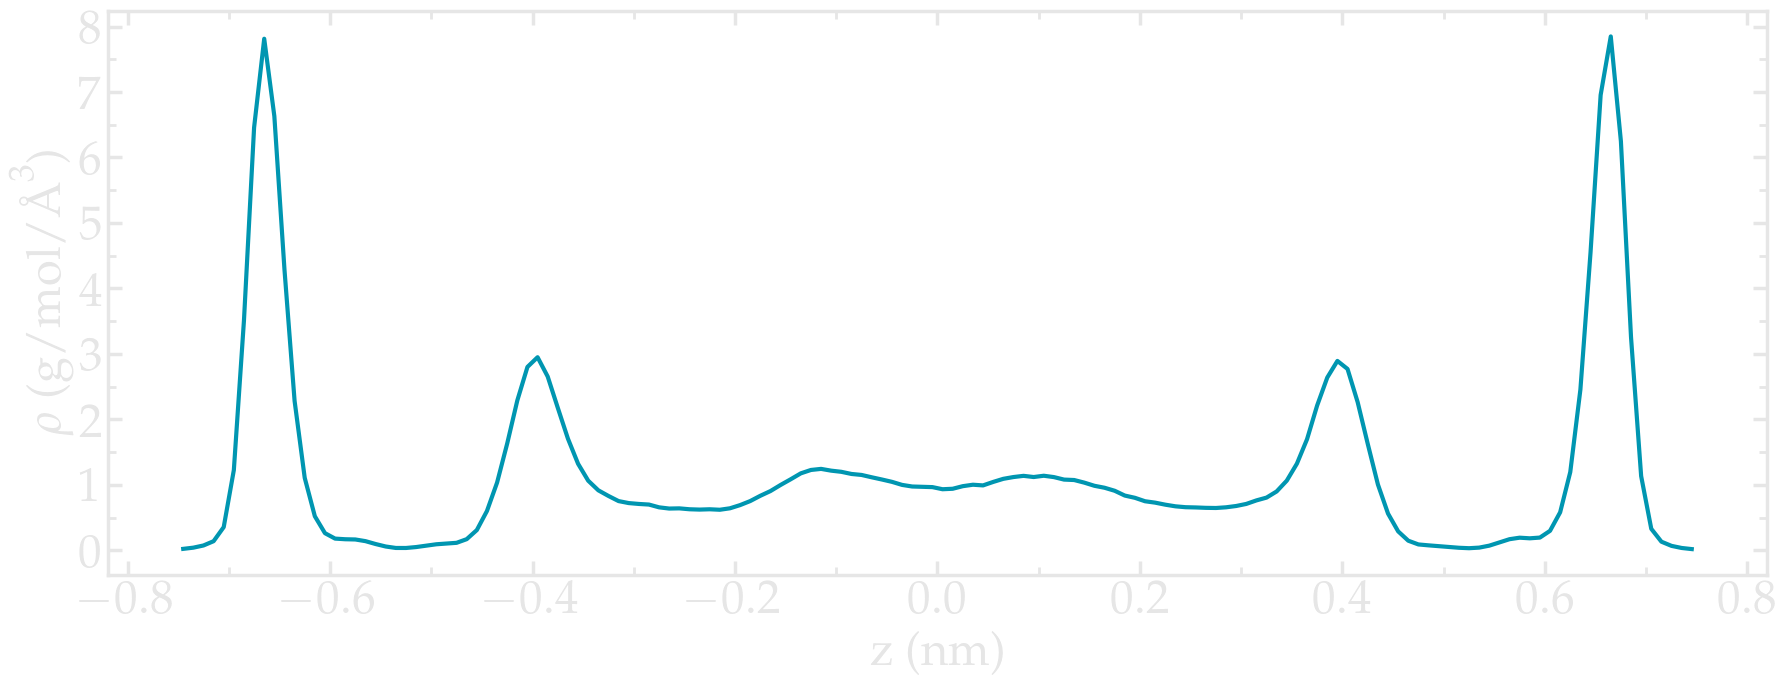

In [7]:
filename = "density"
for mode, mygray in zip(['light', 'dark'], [colors["lightgray"], colors["darkgray"]]):    
    fig = plt.figure(figsize=(18,7))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(z[density_water>0.02], density_water[density_water>0.02], color=colors["myblue"], linewidth=3, label=r'water')
    #ax[-1].plot(z[density_ions>0.002], density_ions[density_ions>0.002], color=colors["myorange"], linewidth=3, label=r'ions')
    #ax[-1].plot(z[(density_solid>0) & (z<0)], density_solid[(density_solid>0) & (z<0)], color=mygray, linewidth=3, label=r'wall')
    #ax[-1].plot(z[(density_solid>0) & (z>0)], density_solid[(density_solid>0) & (z>0)], color=mygray, linewidth=3)
    complete_panel(ax[-1], r'z (nm)', r'$\rho$ (g/mol/$\textrm{\AA}^3$)', legend=False, axis_color=mygray)
    #set_boundaries(plt, x_ticks=np.arange(-1.5, 1.5, 0.5), x_boundaries=(-1.4, 1.4),
    #               y_ticks=np.arange(-30, 40, 10), y_boundaries=(-25, 25))
    #add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)